# 1. COMPRENDER EL PROBLEMA Y EL CASO PRÁCTICO.

#### El departamento de relaciones públicas ha recolectado una gran cantidad de datos sobre sus clientes, como también valoraciones de sus productos de internet. Basándose en esas valoraciones que están en formato de texto, tu y tu equipo, deben predecir si los clientes están satisfechos o no con su producto.

# 2. IMPORTAR LIBRERÍAS Y DATA SETS.

In [109]:
import pandas as pd # librería para trabajar dataframes
import numpy as np # librería para el cálculo matemático en python
import seaborn as sns # librería para realizar gráficos
import matplotlib.pyplot as plt # librería para realizar gráficos

In [110]:
# cargar los datos
reviews_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRUFoJwoTWB5kU2HWptPxW5pHgwRqZDujs-JnB-ICHZ_eIiP6w9ZarTMWhwSzVI_I3tqntD-5OFTRyK/pub?gid=1815125294&single=true&output=tsv', sep='\t')

In [111]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-jul-18,Charcoal Fabric,Loved it!,1
2,4,31-jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-jul-18,Charcoal Fabric,Music,1


In [112]:
# información general del dataset
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3071 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [113]:
reviews_df.shape

(3150, 5)

In [114]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


#### El rating es la valoración que se le da al producto. Va de 1 a 5. El promedio de valoraciones es de 4,5 lo que es bastante bueno. La desviación típica es de 1,1, lo que significa que la gran mayoría de las valoraciones se encuentran entre 3,4 y 5. Al menos el 75% de las valoraciones es de 4 estrellas o superior y al menos el 50% de las valoraciones es de 5 estrellas. También se observa que el feedback es de una media de 0,91 de 0 a 1, lo que es un promedio bastante bueno para el artículo.

#3. EXPLORACIÓN EL DATASET.

In [115]:
# Buscaré si existen valores nulos dentro de los registros
reviews_df.isna().sum().sort_values(ascending= False) # halla nulos, los suma y los ordena

verified_reviews    79
rating               0
date                 0
variation            0
feedback             0
dtype: int64

In [116]:
# Buscaré datos duplicados
reviews_df.duplicated().sum()

715

In [117]:
# Elimino duplicados
reviews_df = reviews_df.drop_duplicates()
print('La cantidad de filas del dataset luego de borrar los registros duplicados es de {}'.format(reviews_df.shape[0]))

La cantidad de filas del dataset luego de borrar los registros duplicados es de 2435


array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

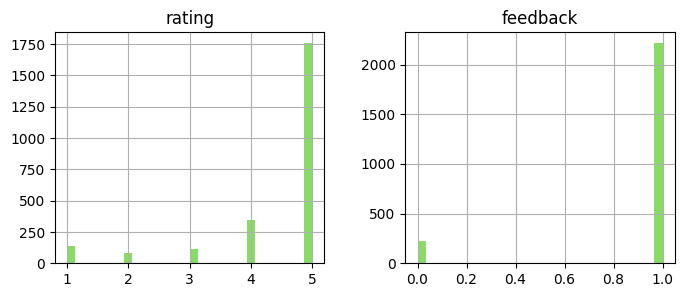

In [118]:
reviews_df.hist(bins=30, figsize=(8,3), color='#88DC65')

#### El rating de valoraciones sigue una distribución long tail a la izquierda, lo que es muy bueno para el producto. El feedback se concentra mayormente en la zona de 1, lo que indica que existe un buen feedback en más de 2000 clientes vs los 250 aproximadamente que dan un feedback de 0.

In [119]:
# Transformar todas los datos de la columna verified_reviews a str:
reviews_df['verified_reviews'] = reviews_df['verified_reviews'].astype(str)

In [120]:
# Crearemos una columna que nos indique el largo del review. Su nombre será length
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
2796,5,30-jul-18,Black Dot,"I do love these things, i have them running my...",1,441
2797,5,30-jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380
2798,4,29-jul-18,Black Dot,Good,1,4
2799,5,29-jul-18,Black Dot,Nice little unit no issues,1,27


<Axes: ylabel='Frequency'>

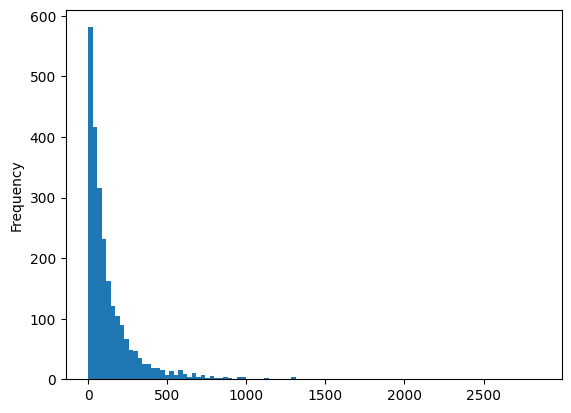

In [121]:
# Ahora veremos en un histograma, cuál es el largo de cada comentario:
reviews_df['length'].plot(bins=100, kind='hist')

<Axes: >

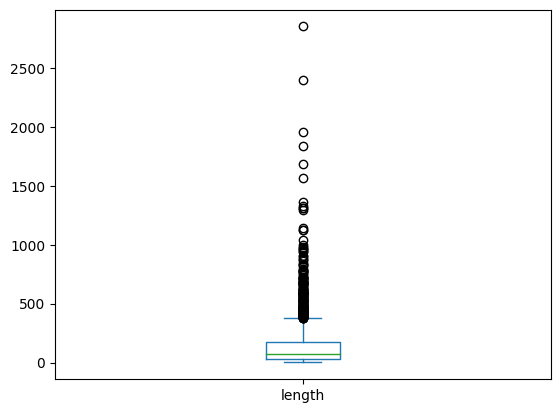

In [122]:
# También podemos ver en un diagrama de cajón y bigote la concentración de registros
reviews_df['length'].plot(kind='box')

#### Observando los gráficos, podemos conjeturar que la gran mayoría de los comentarios se concentra entre 0 a 200 caracteres. También se puede observar que existen muchos datos aislados y estos son reviews superiores a 400 caracteres.

In [123]:
# Veamos medidas de tendencia central para las medidas de length
reviews_df['length'].describe()

count    2435.000000
mean      137.940452
std       192.368646
min         1.000000
25%        31.000000
50%        77.000000
75%       170.500000
max      2851.000000
Name: length, dtype: float64

####  Conclusiones
#### 1. La gran mayoría de los comentarios (75%) se concentra en tener un largo de 0 a 171 caracteres.
#### 2. También se puede observar que existen muchos datos aislados y estos son reviews superior a 400 caracteres.
#### 3. El promedio de longitud de los comentarios es de 138.
#### 4. La mediana de longitud de los comentarios es de 77.
#### 5. El comentario más largo es de 2851 caracteres.
#### 6. La desviación estándar es de 192, lo que indica que la mayoría de los comentarios se concentra entre los 0 y los 330 caracteres.

In [124]:
# Veremos cual es el comentario con más caracteres:
reviews_df[reviews_df['length']==2851]

,rating,date,variation,verified_reviews,feedback,length
2016,5,20-jul-18,Black Plus,Incredible piece of technology.I have this rig...,1,2851


In [125]:
reviews_df[reviews_df['length']==2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [126]:
# Ahora veremos cuántos comentarios son outliers, ya que se encuentran fuera de la zona delimitada por la desviación standard:
reviews_df[reviews_df['length']>330].shape[0]

230

In [127]:
print('Los datos que son outliers son un {}% del total'.format(round(reviews_df[reviews_df['length']>330].shape[0]*100/reviews_df.shape[0],1)))

Los datos que son outliers son un 9.4% del total


<Axes: xlabel='rating', ylabel='count'>

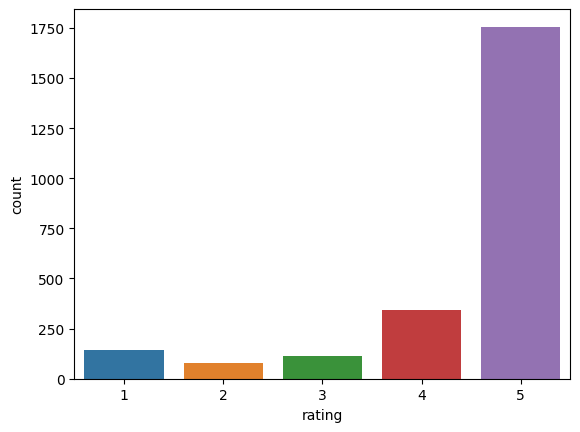

In [128]:
# Veremos la cantidad de estrellas que se le asignó al producto
sns.countplot(x = 'rating', data = reviews_df )

In [129]:
una_estrella = reviews_df[reviews_df['rating']==1].shape[0]
dos_estrellas = reviews_df[reviews_df['rating']==2].shape[0]
tres_estrellas = reviews_df[reviews_df['rating']==3].shape[0]
cuatro_estrellas = reviews_df[reviews_df['rating']==4].shape[0]
cinco_estrellas = reviews_df[reviews_df['rating']==5].shape[0]
total = reviews_df.shape[0]

resenas_malas = round((una_estrella + dos_estrellas)*100/total,1)
resenas_neutras = round(tres_estrellas*100/total,1)
resenas_buenas = round((cuatro_estrellas+cinco_estrellas)*100/total,1)

In [130]:
print('El porcentaje de malas reseñas es de un {}%. \nEl porcentaje de reseñas neutras es de {}%. \nY el porcentaje de reseñas buenas es de {}%.'.format(resenas_malas, resenas_neutras, resenas_buenas))

El porcentaje de malas reseñas es de un 9.1%. 
El porcentaje de reseñas neutras es de 4.6%. 
Y el porcentaje de reseñas buenas es de 86.3%.


<Axes: xlabel='variation', ylabel='rating'>

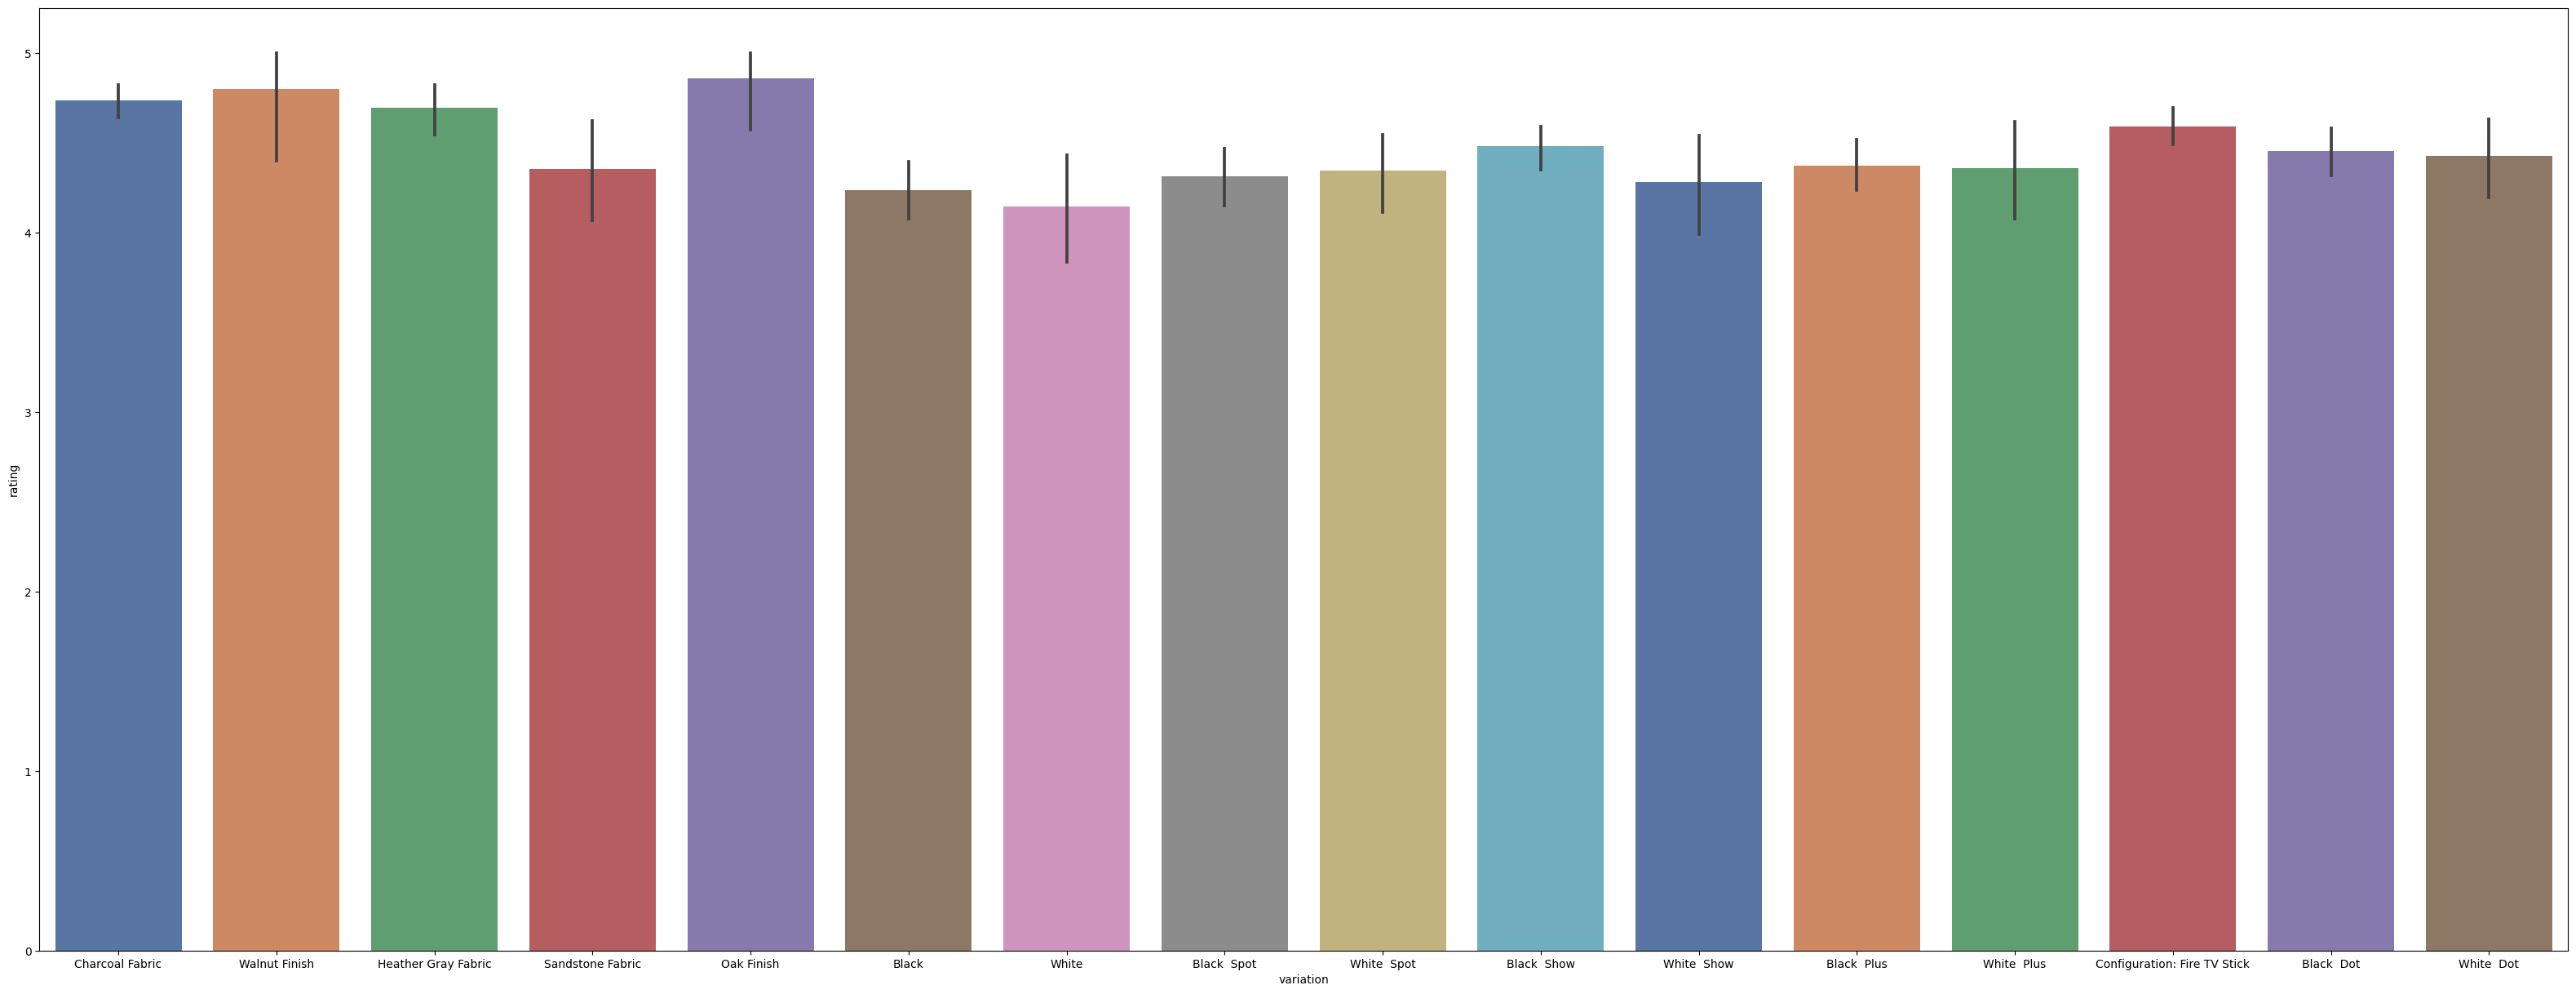

In [131]:
plt.figure(figsize=(40,15))
sns.barplot(x = 'variation', y = 'rating', data = reviews_df, palette = 'deep')



#### Se puede observar que el producto que tiene menor calificación, es la variación 'white' y la de mejor calificación es la variación 'Oak Finish'.
#### Se puede observar también que ninguna de las variaciones baja de 4 estrellas y ninguna alcanza las 5.

In [132]:
# Ahora, tomaremos todos los comentarios que están guardados en la serie 'verified_reviews' y los guardaremos en una lista:
sentences = reviews_df['verified_reviews'].tolist()

In [133]:
# Cada elemento de la siguiente lista es un comentario de 'reviews_df'
print(sentences)

['Love my Echo!', 'Loved it!', 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.', 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.', 'Music', 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.', 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.', "I think this is the 5th one I've purcha

In [134]:
# Ahora, uniremos todos los elementos de la lista 'sentences' para crear solo un elemento del tipo 'str'. Para esto usaremos la función
# join y uniremos los textos usando el valor espacio ' '.
sentences_as_one_string = ' '.join(sentences)

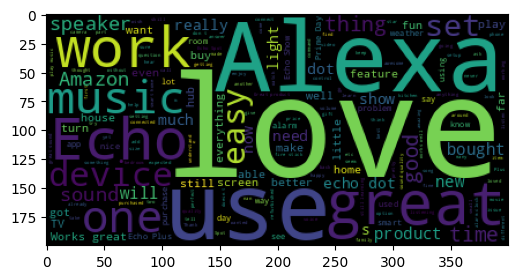

In [135]:
from wordcloud import WordCloud

plt.figure(figsize=(17,3))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [136]:
# podemos separar los comentarios con feedback positivo y negativo y ver la nube de palabras. Primero separamos en dos dataframes:
positive = reviews_df[reviews_df['feedback']== 1]
negative = reviews_df[reviews_df['feedback']== 0]

In [137]:
# después creamos la lista de reseñas:
positive_list = positive['verified_reviews'].tolist()
negative_list = negative['verified_reviews'].tolist()

# y creamos una variable con todos los comentarios, ya sean positivos o negativos)
positive_sentence_as_one_string = ' '.join(positive_list)
negative_sentence_as_one_string= ' '.join(negative_list)

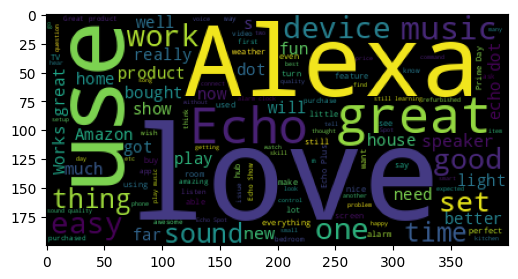

In [138]:
plt.figure(figsize = (17,3))
plt.imshow(WordCloud().generate(positive_sentence_as_one_string))

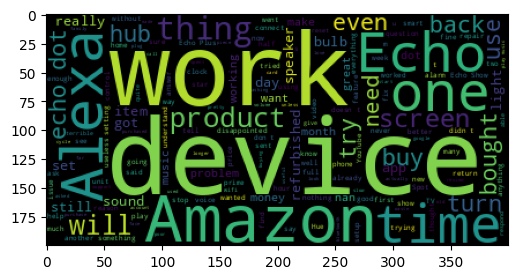

In [139]:
plt.figure(figsize=(17,3))
plt.imshow(WordCloud().generate(negative_sentence_as_one_string))

# 4. LIMPIEZA DE DATOS.

In [140]:
# primero eliminaré algunas columnas, solo necesito el texto:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-jul-18,Charcoal Fabric,Music,1,5


In [141]:
reviews_df = reviews_df.drop(['rating','date','length'], axis = 1)
reviews_df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [142]:
# Ahora a crear variables dummies para el tipo de Alexa:
variation_dummies = pd.get_dummies(reviews_df['variation'], drop_first = True)
variation_dummies.head()

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [143]:
# Borramos la columna 'variation' para luego concatenar con 'variation_dummies':
reviews_df = reviews_df.drop(['variation'], axis = 1)
reviews_df.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [144]:
# concatenamos
reviews_df = pd.concat([reviews_df, variation_dummies], axis = 1)
reviews_df.head()

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# 5. ELIMINAR SIGNOS DE PUNTUACIÓN.

In [145]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [146]:
test = 'Hello!!! what are you doing colega!! My mail is this %&/() de&/'

In [147]:
# creamos una lista con el texto de prueba y eliminamos los signos de puntuación con el método de crear listas
test_punc_removed = [char for char in test if char not in string.punctuation]

# Aquí se crea un bucle "for char in test" que hará que char tome el valor de cada caracter del texto de "test"
# el condicional if, nos dice que si el valor de char está dentro de la lista de "string.punctuation",
# char tiene que quedarse con el valor del caracter y guardarse en la lista "test_punc_removed"

test_punc_removed_join = ''.join(test_punc_removed) # se usa un join para unir las palabras de la lista en un str con espacios
test_punc_removed_join


'Hello what are you doing colega My mail is this  de'

#6. STOP WORDS

In [148]:
# importamos la biblioteca de NLTK
import nltk
nltk.download('stopwords') # descargamos las stopwords para su posterior uso

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [149]:
# importamos las stopwords que ya habíamos descargado
from nltk.corpus import stopwords
stopwords.words('english') # accedemos a las stopwords en idioma inglés

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [150]:
# vamos a eliminar las stopwords y crear una lista con el texto completamente limpio:

test_punc_removed_join_clean = [word for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

# la lista test_punc_removed_join_clean se va a crear gracias a los siguientes pasos:

# el word antes del for va a tomar el valor del siguiente proceso guardándolo en una lista:
# for word in "test..split()" es un bucle que tomará cada división resultante del método split() para pasarlo por la condición if
# la condición if nos indica que si la palabra "word", una vez transformada a minúscula, no está dentro de la lista de las stopwords
# se guardará dentro de la lista "test_punc_removed_join_clean"

test_punc_removed_join_clean

['Hello', 'colega', 'mail', 'de']

#7. EJEMPLO TOKENIZACIÓN

In [151]:
from sklearn.feature_extraction.text import CountVectorizer # extraemos la clase CV del modulo de sklearn feature_extraction
# la idea es vectorizar el texto

# vamos a trabajar con un ejemplo antes de. Creamos un texto de ejemplo:
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

# creamos una instancia de la clase CountVectorizer:
vectorizer = CountVectorizer()

# Guardamos en X el ajuste y la transformación de las palabras a una matriz de vectores, donde las filas son los documentos de sample_data y
# las columnas son las palabras que se encuentran en nuestros documentos.
X = vectorizer.fit_transform(sample_data)

In [152]:
# vemos las palabras y el orden en el que fueron vectorizadas
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [153]:
# Vemos el array
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


#8. TOKENIZACION

In [154]:
# definimos una función que nos permita hacer el proceso desde la eliminación de puntuación.
def message_cleaning(message):
  test_punc_removed = [char for char in message if char not in string.punctuation]
  test_punc_removed_join = ''.join(test_punc_removed)
  test_punc_removed_join_clean = [word for word in test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
  return test_punc_removed_join_clean

In [155]:
# probamos la función
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [156]:
# revisamos
print(reviews_df_clean[0])

['Love', 'Echo']


In [157]:
# y revisamos
print(reviews_df['verified_reviews'][0])

Love my Echo!


In [158]:
# seguimos revisando
reviews_df_clean

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
2796    [love, things, running, entire, home, TV, ligh...
2797    [complaint, sound, quality, isnt, great, mostl...
2798                                               [Good]
2799                         [Nice, little, unit, issues]
2800    [echo, dot, easy, set, use, helps, provide, mu...
Name: verified_reviews, Length: 2435, dtype: object

In [159]:
# Vectorizamos todos los reviews
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer  = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [160]:
# vemos las palabras y el orden en el que fueron vectorizadas
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [161]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [162]:
reviews_countvectorizer.toarray().shape

(2435, 5212)

In [163]:
reviews_df.tail()

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
2796,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2797,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2798,Good,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2799,Nice little unit no issues,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2800,The echo dot was easy to set up and use. It he...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [164]:
# eliminamos la columna de texto en la que estuvimos trabajando.
reviews_df.drop(['verified_reviews'], axis = 1, inplace = True)
reviews_df.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [165]:
# reindexamos el dataframe revies_df o se presentarán errores en la concatencación
reviews_df = reviews_df.reset_index(drop=True)
reviews_df.tail()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
2430,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2431,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2432,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2433,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2434,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [166]:
# creamos el dataframe reviews a partir del array reviews_countvectorizer:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())
reviews

,0,1,2,3,4,5,6,7,8,9,...,5202,5203,5204,5205,5206,5207,5208,5209,5210,5211
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
# concatenamos el dataframe reviews_df con el dataframe reviews, de manera vertical:
reviews_df = pd.concat([reviews_df, reviews], axis = 1)
reviews_df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,5202,5203,5204,5205,5206,5207,5208,5209,5210,5211
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2431,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2432,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2433,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
reviews_df.shape

(2435, 5228)

In [169]:
# guardaremos el dataframe reviews_df en la variable "X" sin la variable feedback:
X = reviews_df.drop(['feedback'], axis = 1)

In [175]:
# y transformamos todas las columnas del dataframe a "str" o tendremos problemas en el modelo de Naive Bayes
X.columns = X.columns.astype(str)
X

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,...,5202,5203,5204,5205,5206,5207,5208,5209,5210,5211
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2432,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2433,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
# y la variable "y" serán todos los feedbacks del estudio
y = reviews_df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
2430    1
2431    1
2432    1
2433    1
2434    1
Name: feedback, Length: 2435, dtype: int64

#9. ENTRENAMIENTO DEL MODELO DE CLASIFICACIÓN: NAVES BAYES

In [177]:
# importamos train_test_split para dividir en entrenamiento y test:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [178]:
# importamos la clase MultinomialNB del módulo naive_bayes de sklearn:
from sklearn.naive_bayes import MultinomialNB

In [179]:
nb_multinomial = MultinomialNB() # instanciamos la clase

nb_multinomial.fit(X_train, y_train) # ajustamos el modelo a los datos

MultinomialNB()

#### VALIDAR LA EFICACIA DEL MODELO ENTRENADO

In [180]:
# importamos classification_report y confusion_matrix del módulo metrics de sklearn:
from sklearn.metrics import classification_report, confusion_matrix

In [181]:
# generamos las predicciones a partir del conjunto X de entrenamiento:
y_predict_train = nb_multinomial.predict(X_train)
# revisamos
y_predict_train

array([1, 1, 1, ..., 1, 1, 1])

<Axes: >

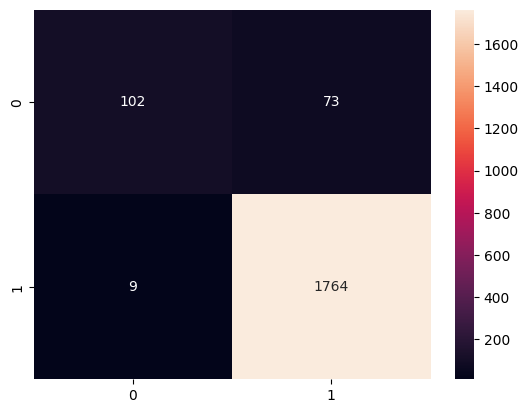

In [182]:
# creamos la instancia de confusion_matrix evaluando y_train con y_predict_train
cm_train = confusion_matrix(y_train, y_predict_train)
# graficamos la matriz de confusión:
sns.heatmap(cm_train, annot = True, fmt = 'd')

In [184]:
# revisamos el reporte y como anda el modelo con los valores de entrenamiento:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.92      0.58      0.71       175
           1       0.96      0.99      0.98      1773

    accuracy                           0.96      1948
   macro avg       0.94      0.79      0.85      1948
weighted avg       0.96      0.96      0.95      1948



In [185]:
# generamos las predicciones usando el conjunto de valores de X_test:
y_predict_test = nb_multinomial.predict(X_test)

<Axes: >

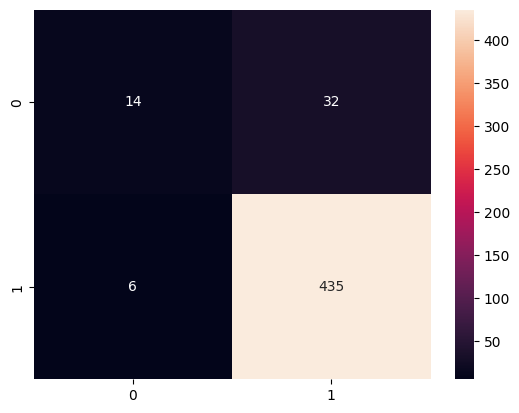

In [186]:
# creamos una matriz de confusión para y_test con y_predict_test:
cm_test = confusion_matrix(y_test, y_predict_test)
# graficamos
sns.heatmap(cm_test, annot = True, fmt = 'd')

In [187]:
# imprimimos el reporte de clasificación usando y_test con y_predict_test
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.70      0.30      0.42        46
           1       0.93      0.99      0.96       441

    accuracy                           0.92       487
   macro avg       0.82      0.65      0.69       487
weighted avg       0.91      0.92      0.91       487



#10. ENTRENAMIENTO DEL MODELO DE CLASIFICACIÓN: REGRESIÓN LOGÍSTICA.

In [190]:
# importar el modelo LogisticRegression del módulo linearmodel de la librería sklearn.
from sklearn.linear_model import LogisticRegression

In [191]:
#importar accuracy_score desde el módulo métrics de sklearn:
from sklearn.metrics import accuracy_score

In [192]:
# crear la instancia model de LogisticRegression:
model = LogisticRegression()

In [193]:
# ajustar el modelo a los datos de entrenamiento:
model.fit(X_train, y_train)

LogisticRegression()

In [197]:
# realizar la predicción con el conjunto de prueba X_test:
y_predict = model.predict(X_test)

In [201]:
# imprimir Accuracy usando accuracy_score con y_test con y_predict:
print('El Accuracy del modelo es de {}%'.format(round(100*accuracy_score(y_test, y_predict),1)))

El Accuracy del modelo es de 91.8%


<Axes: >

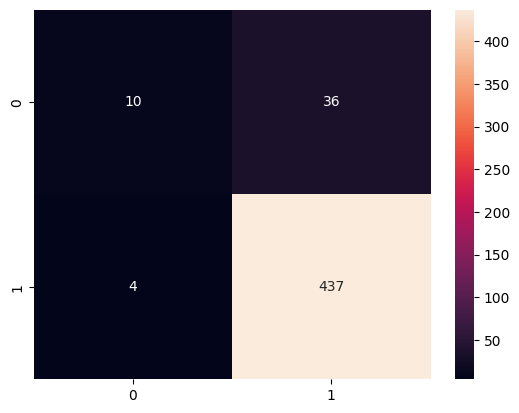

In [199]:
# crear matriz de confusión:
cm = confusion_matrix(y_test, y_predict)
# plotear matriz de confusión:
sns.heatmap(cm, annot = True, fmt = 'd')

In [204]:
# imprimir el reporte de clasificación:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.71      0.22      0.33        46
           1       0.92      0.99      0.96       441

    accuracy                           0.92       487
   macro avg       0.82      0.60      0.64       487
weighted avg       0.90      0.92      0.90       487

